In [10]:
#%matplotlib ipympl

import matplotlib.pyplot as plt
import numpy as np
from H_radial_distribution import plot_rad_dist
from H_angular_distribution import plot_angular_dist
from H_orbital_plot import plot_orbital
from IPython.display import display

# Task 1 (20 Points)

1. Perform a simulation for three different values of the quantum number $n$, starting at $n = 1$, leaving $l$ at zero. 
   
   What happens to the maximum of the probability distribution for increasing values of $n$? (15 pts)
    
---
2. Repeat the simulation for a value of $l$ that is not zero. 

    How does the distribution for $l \neq 0$ compare to that for $l = 0$ for the same value of n? (5 pts)

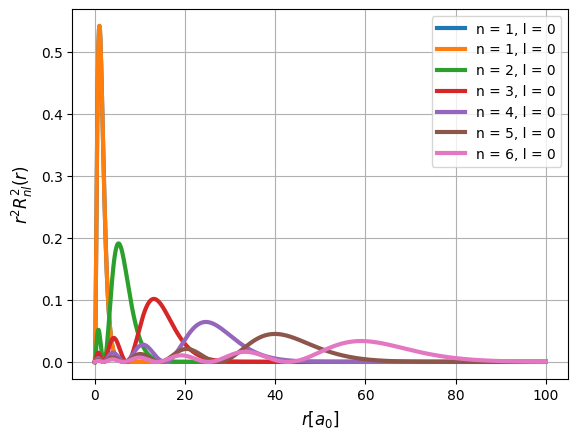

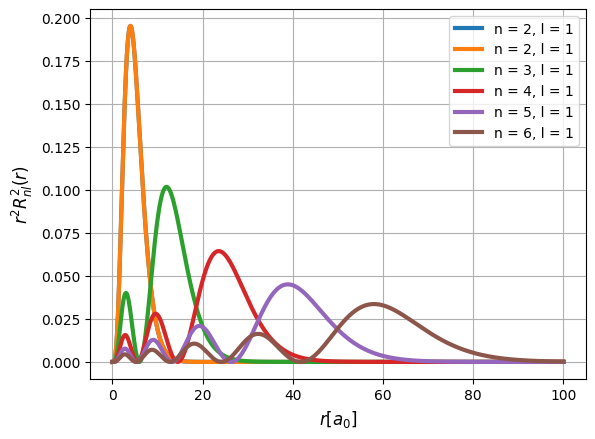

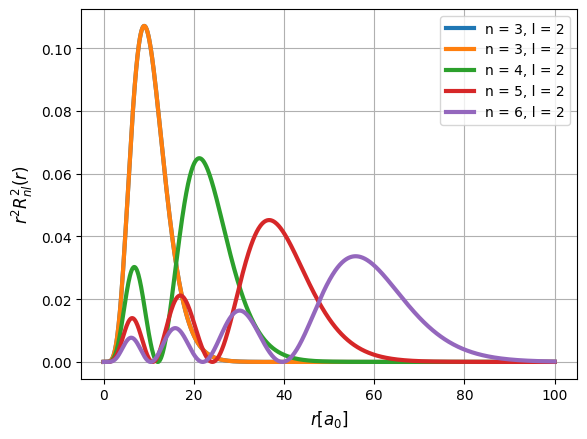

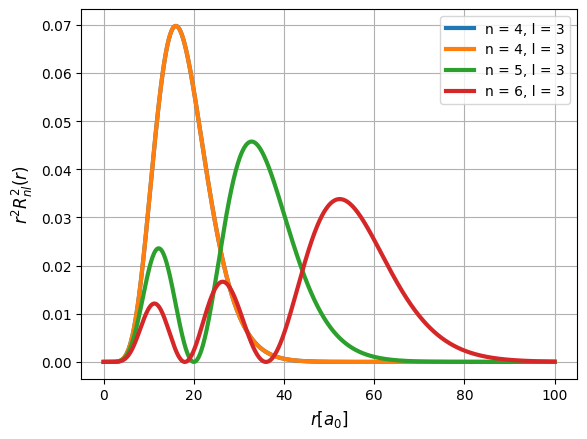

In [6]:
ax = []
for i in range(0,4):
    ax.append(plt.subplots(1, 1)[1])

l = [0, 1, 2, 3]

n = [1, 2, 3, 4, 5, 6]

for l, ax in zip(l, ax):
    n_filtered = [i for i in n if i > l]
    plot_rad_dist(n = n_filtered, l = l, ax = ax)

For $l=0$, the maximum of the PDF initially decreases very quickly as n increases, but the rate of decrease then quickly slows down as n continues to increase.

Neither the shape nor the height of the graphs are noticably affected by varying $l$ while holding $n$ constant.

# Task 2 (20 points + 10 points bonus)

1. Perform a simulation for $l = 0$ and for all possible values of $m$ for $l = 1$. 

    Did you expect the shapes to look like this? 
    
    How does this compare with the multipole moments (dipole, quadrupole) used in Electromagnetics? (20 pts)

---
2. Perform a simulation for $l = 2$ and a value of $m$ of your choice other than $m = 0$. Did you expect this shape to appear? (10 pts bonus)

C:\Users\mbles\DataspellProjects\EEE_434_functions\H_angular_distribution.py:56: RuntimeWarning: invalid value encountered in divide
  


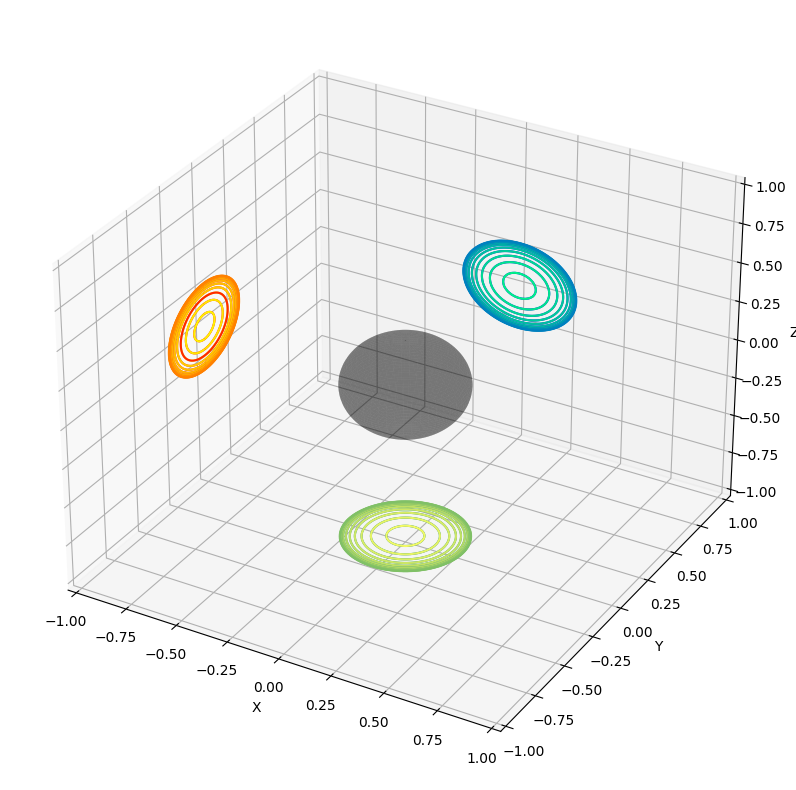

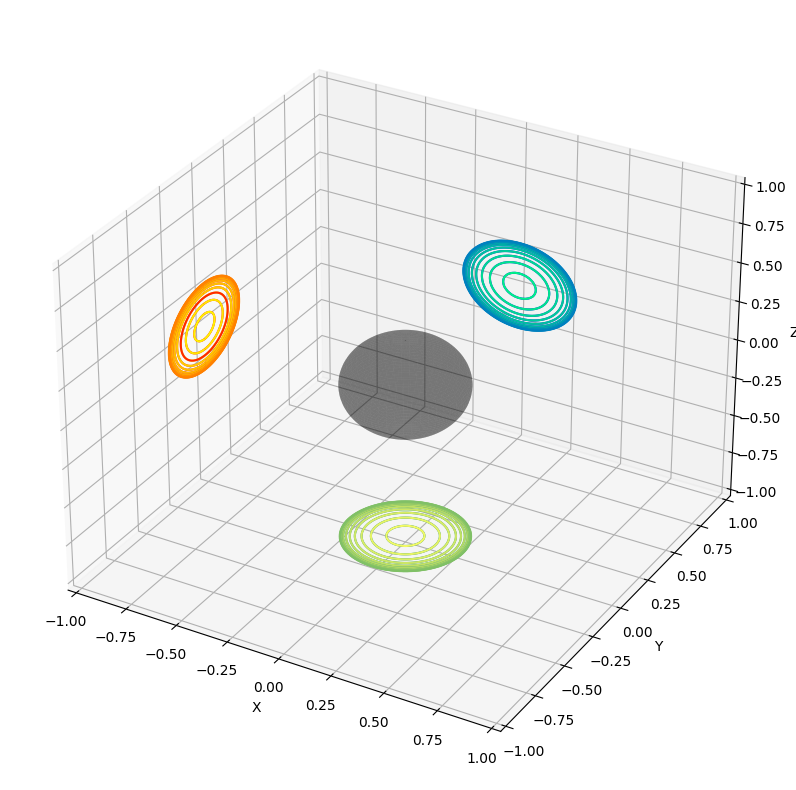

array(None, dtype=object)

In [16]:
l = 0

m = 0

plot_angular_dist(l, m)